# Table of Contents
* <a href="#ch1">Chapter 1 &nbsp;Introduction</a>

* <a href="#ch2">Chapter 2 &nbsp;Data Overview</a>
    * <a href="#ch2.1">2.1 &nbsp;Data sources and chosen variables</a>
    * <a href="#ch2.2">2.2 &nbsp;Datasets overview</a>
    
* <a href="#ch3">Chapter 3 &nbsp;Data Preprocessing and Exploration</a>
    * <a href="#ch3.1">3.1 &nbsp;Data Preprocessing</a>
    * <a href="#ch3.2">3.2 &nbsp;Data Cleaning</a>
        * <a href="#ch3.2.1">Step1 &nbsp;Missing data</a>
        * <a href="#ch3.2.2">Step2 &nbsp;Irregular data</a>
        * <a href="#ch3.2.3">Step3 &nbsp;Unecessary data</a>
        * <a href="#ch3.2.4">Step4 &nbsp;Inconsistent data</a>
    * <a href="#ch3.3">3.3 &nbsp;Data Exlporation</a>
        * <a href="#ch3.3.1">3.3.1 &nbsp;Data Integration</a>
        * <a href="#ch3.3.2">3.3.2 &nbsp;Descriptive analysis</a>   
        
* <a href="#ch4">Chapter 4 &nbsp;Methods and Implementation</a>
    * <a href="#ch4.1">4.1 &nbsp;Linear Regression model</a>
    * <a href="#ch4.2">4.2 &nbsp;XGBoost Regression model</a>

* <a href="#ch5">Chapter 5 &nbsp;Conclusion and Limitations</a>
    * <a href="#ch5.1">5.1 &nbsp;Conclusion</a>
    * <a href="#ch5.2">5.2 &nbsp;Limitations</a>
    * <a href="#ch5.3">5.3 &nbsp;Future works</a>
    
* <a href="#references">References</a>
    
* <a href="#appendix">Apendix</a>
    * <a href="#utils">utils.py</a>
    * <a href="#trello">Project Management(Trello)</a>
    




In [1]:
### necessary packages ###

# !pip3 install pandas-bokeh
# !pip3 install -U matplotlib
# !pip install xgboost
# !pip install shap
# !pip install graphviz


In [2]:
# import packages
import os
from utils import *

# Display full output rather than just the last line of output
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

Loading BokehJS ...

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

---

# <center><a name="ch1">Chapter 1&nbsp;&nbsp;&nbsp;&nbsp;Introduction</a></center>

Every year, the London Fire Brigade (LFB) receives thousands of emergency calls to report fire incidents across the entire city. With there being over 30 boroughs across London, are certain boroughs more susceptible to fire incidents compared to others?  

Using socioeconomic data to differentiate between more and less affluent areas, it will be compared with the LFB incident report dataset to understand if there is a relationship between the number of fire reports and socioeconomic levels.

----

# <center><a name="ch2">Chapter 2&nbsp;&nbsp;&nbsp;&nbsp;Data Overview</a></center>

## <a name="ch2.1">2.1 Data sources and variables</a>

We used the London Datastore to source data for London Fire Incidents in the different London Boroughs. We also searched the London Datastore to acquire the appropriate data that describe the socioeconomic factors and other demographic information. The variables we decided to use are as follows: 

* Number of fire-related incidents per London Borough

* Unemployment rate by London Borough, of London residents aged 16+ who are ILO unemployed 

* Education level: Weighted average of education level across age groups  

* Average house price per London Borough 

* Average Income of Tax Payers: (Personal incomes by tax year) by London Borough	 

* Crime rates per thousand population				 

The common time period across all datasets was 2009 – 2017 inclusive.

The London Datastore Terms and Conditions grant us permission to use the published data to do our analysis as long as it does not infringe or interfere with the rights of others. It also prohibits comments on the data which are deemed to be offensive or defamatory. Finally, the Greater London Authority states that they cannot warrant the quality or accuracy of the data. 

## <a name="ch2.2">2.2 Datasets overview </a>

Quick Access: &nbsp; &nbsp; [LFB Incident](#LFB-Incident-dataset) &nbsp; &nbsp; &nbsp; [House price](#House-price-dataset) &nbsp; &nbsp; &nbsp; [Income](#Income-dataset) &nbsp; &nbsp; &nbsp; [Crime rate](#Crime-rate-dataset) &nbsp; &nbsp; &nbsp; [Unemployment rate](#Unemployment-rate-dataset) &nbsp; &nbsp; &nbsp; [Education level](#Education-level-dataset)

Let's first have a look at these datasets.

In [3]:
# convert xlsx files into csv and store in a new folder
xlsx_to_csv_folder('Data/Raw', 'Data/Raw')

Done with land-registry-house-prices-borough.xls
Done with income-of-tax-payers.xlsx
Done with mb-unemployment-rates.xlsx
Done with met-police-recorded-offences-rates-borough.xlsx
Done with Qualifications-of-working-age-NVQ.xlsx
Done with LFB Incident data - Datastore - with notional cost and UPRN from January 2009.xlsx
Done!!


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### LFB Incident dataset

In [4]:
'''
LFB Incident dataset
'''
# Aurora
df1 = pd.read_csv('Data/Raw/LFB Incident data - Datastore - with notional cost and UPRN from January 2009.csv')
print("Shape of Dataset:" + str(df1.shape))
print("\nInfo of Dataset:")
df1.info()
print("\nFirst 5 rows of Dataset:")
df1.head()

Shape of Dataset:(988279, 12)

Info of Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988279 entries, 0 to 988278
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   IncidentNumber      988279 non-null  object
 1   DateOfCall          988279 non-null  object
 2   CalYear             988279 non-null  int64 
 3   TimeOfCall          988279 non-null  object
 4   HourOfCall          988279 non-null  int64 
 5   IncidentGroup       988279 non-null  object
 6   PropertyCategory    988279 non-null  object
 7   PropertyType        988279 non-null  object
 8   Postcode_full       536768 non-null  object
 9   Postcode_district   988279 non-null  object
 10  IncGeo_BoroughName  988279 non-null  object
 11  ProperCase          988279 non-null  object
dtypes: int64(2), object(10)
memory usage: 90.5+ MB

First 5 rows of Dataset:


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,PropertyCategory,PropertyType,Postcode_full,Postcode_district,IncGeo_BoroughName,ProperCase
0,235138081,2009-01-01,2009,00:00:37,0,Special Service,Road Vehicle,Car,SW11 4LB,SW11,WANDSWORTH,Wandsworth
1,1091,2009-01-01,2009,00:00:46,0,Special Service,Outdoor,Lake/pond/reservoir,SE1 7SG,SE1,LAMBETH,Lambeth
2,2091,2009-01-01,2009,00:03:00,0,Fire,Outdoor,Road surface/pavement,N9 9EL,N9,ENFIELD,Enfield
3,3091,2009-01-01,2009,00:04:27,0,Fire,Outdoor,Domestic garden (vegetation not equipment),UB10 0DG,UB10,HILLINGDON,Hillingdon
4,5091,2009-01-01,2009,00:05:39,0,Fire,Outdoor,Cycle path/public footpath/bridleway,N7 8HG,N7,ISLINGTON,Islington


<br>

### House price dataset

In [5]:
'''
House Price dataset
'''
# Kevin
df2 = pd.read_csv('Data/Raw/land-registry-house-prices-borough.csv')
print("Shape of Dataset:" + str(df2.shape))
print("\nInfo of Dataset:")
df2.info()
print("\nFirst 5 rows of Dataset:")
df2.head()

Shape of Dataset:(49, 25)

Info of Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Code    45 non-null     object 
 1   Area    45 non-null     object 
 2   1995    45 non-null     float64
 3   1996    45 non-null     float64
 4   1997    45 non-null     float64
 5   1998    45 non-null     float64
 6   1999    45 non-null     float64
 7   2000    45 non-null     float64
 8   2001    45 non-null     float64
 9   2002    45 non-null     float64
 10  2003    45 non-null     float64
 11  2004    45 non-null     float64
 12  2005    45 non-null     float64
 13  2006    45 non-null     float64
 14  2007    45 non-null     float64
 15  2008    45 non-null     float64
 16  2009    45 non-null     float64
 17  2010    45 non-null     float64
 18  2011    45 non-null     float64
 19  2012    45 non-null     float64
 20  2013    45 non-null     float64
 2

,Code,Area,1995,1996,1997,1998,1999,2000,2001,2002,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E09000001,City of London,146043.0,136344.0,156418.0,227377.0,232854.0,255964.0,266277.0,270879.0,...,412940.0,449611.0,524581.0,541192.0,537160.0,775504.0,894046.0,926292.0,928037.0,950760.0
2,E09000002,Barking and Dagenham,50615.0,51680.0,56222.0,63874.0,69544.0,84111.0,94451.0,118795.0,...,196942.0,166483.0,179018.0,180165.0,181471.0,187943.0,215810.0,244126.0,289176.0,301518.0
3,E09000003,Barnet,111019.0,111203.0,135580.0,147673.0,173356.0,199147.0,220955.0,257942.0,...,387784.0,382143.0,444386.0,440755.0,450269.0,479968.0,534786.0,566874.0,584202.0,667593.0
4,E09000004,Bexley,66294.0,69941.0,75484.0,85497.0,94395.0,109347.0,126216.0,151225.0,...,219495.0,209521.0,226616.0,226283.0,225465.0,236952.0,267268.0,295262.0,340626.0,357779.0


<br>

### Income dataset

In [6]:
'''
Income dataset
'''
# Ariel
df3 = pd.read_csv('Data/Raw/income-of-tax-payers.csv')
print("Shape of Dataset:" + str(df3.shape))
print("\nInfo of Dataset:")
df3.info()
print("\nFirst 5 rows of Dataset:")
df3.head()

Shape of Dataset:(52, 10)

Info of Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48 non-null     object
 1   2009        48 non-null     object
 2   2010        48 non-null     object
 3   2011        48 non-null     object
 4   2012        48 non-null     object
 5   2013        48 non-null     object
 6   2014        48 non-null     object
 7   2015        48 non-null     object
 8   2016        48 non-null     object
 9   2017        48 non-null     object
dtypes: object(10)
memory usage: 4.2+ KB

First 5 rows of Dataset:


,Unnamed: 0,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Area,Mean £,Mean £,Mean £,Mean £,Mean £,Mean £,Mean £,Mean £,Mean £
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,City of London,137000,127000,117000,131000,151000,144000,142000,157000,148000
3,Barking and Dagenham,23100,22500,22800,23700,24600,25500,25900,26700,27400
4,Barnet,41600,38800,39200,41000,45500,45800,49000,48600,49500


<br>

### Crime Rate dataset

In [7]:
'''
Crime Rate dataset
'''
# Giota
df4 = pd.read_csv('Data/Raw/met-police-recorded-offences-rates-borough.csv')
print("Shape of Dataset:" + str(df4.shape))
print("\nInfo of Dataset:")
df4.info()
print("\nFirst 5 rows of Dataset:")
df4.head()

Shape of Dataset:(41, 10)

Info of Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  38 non-null     object
 1   Unnamed: 1  37 non-null     object
 2   Unnamed: 2  37 non-null     object
 3   Unnamed: 3  37 non-null     object
 4   Unnamed: 4  37 non-null     object
 5   Unnamed: 5  37 non-null     object
 6   Unnamed: 6  36 non-null     object
 7   Unnamed: 7  36 non-null     object
 8   Unnamed: 8  36 non-null     object
 9   Unnamed: 9  36 non-null     object
dtypes: object(10)
memory usage: 3.3+ KB

First 5 rows of Dataset:


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Borough,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barking and Dagenham,115.89891680003711,111.74118707061606,104.88519891926185,100.652839933914,90.47019311502939,82.85996542356138,81.87337993080982,86.52879754825997,70.89993219025477
3,Barnet,77.75078711838025,75.97107240861813,73.13096477899374,73.50547354407085,69.6897427161525,61.56797294954049,61.859354787085074,65.78507259850772,55.81442332348226
4,Bexley,71.34726364647125,67.72417662374093,59.550693291607246,52.2738793851547,52.652697090122125,50.011196221169726,51.19546411523149,52.217293984521476,45.6079424742605


<br>

In [8]:
'''
Unemployment Rate dataset
'''
# Kai
df5 = pd.read_csv('Data/Raw/mb-unemployment-rates.csv')
print("Shape of Dataset:" + str(df5.shape))
print("\nInfo of Dataset:")
df5.info()
print("\nFirst 5 rows of Dataset:")
df5.head()

Shape of Dataset:(51, 10)

Info of Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Area                47 non-null     object
 1   Jan 2009-Dec 2009   48 non-null     object
 2   Jan 2010-Dec 2010   48 non-null     object
 3   Jan 2011-Dec 2011   48 non-null     object
 4   Jan 2012-Dec 2012   48 non-null     object
 5   Jan 2013-Dec 2013   48 non-null     object
 6   Jan 2014-Dec 2014   48 non-null     object
 7   Jan 2015-Dec 2015   48 non-null     object
 8   Jan 2016-Dec 2016   48 non-null     object
 9   Jan 2017-Dec 2017   48 non-null     object
dtypes: object(10)
memory usage: 4.1+ KB

First 5 rows of Dataset:


,Area,Jan 2009-Dec 2009,Jan 2010-Dec 2010,Jan 2011-Dec 2011,Jan 2012-Dec 2012,Jan 2013-Dec 2013,Jan 2014-Dec 2014,Jan 2015-Dec 2015,Jan 2016-Dec 2016,Jan 2017-Dec 2017
0,NaN,Rate,Rate,Rate,Rate,Rate,Rate,Rate,Rate,Rate
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,City of London,-,-,-,-,-,-,-,-,-
3,Barking and Dagenham,11.9,13.1,13,13.5,13.6,10.7,9.7,6.8,7.7
4,Barnet,7.5,7,8,8.9,6.5,6.4,5.8,4.9,4.4


<br>

### Education Level dataset

In [9]:
'''
Education Level dataset
'''
# Aurora
df6 = pd.read_csv('Data/Raw/Qualifications-of-working-age-NVQ.csv')
print("Shape of Dataset:" + str(df6.shape))
print("\nInfo of Dataset:")
df6.info()
print("\nFirst 5 rows of Dataset:")
df6.head()

Shape of Dataset:(55, 124)

Info of Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Columns: 124 entries, Unnamed: 0 to Unnamed: 123
dtypes: float64(19), object(105)
memory usage: 53.4+ KB

First 5 rows of Dataset:


,Unnamed: 0,Unnamed: 1,% of people aged 25-64 with NVQ4+,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123
0,Code,Area name,2004,2005.000000,2006,2007,2008,2009,2010,2011,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,E09000001,City of London,.,81.250000,.,.,.,.,.,.,...,!,!,!,!,!,!,!,!,-,-
2,E09000002,Barking and Dagenham,15.9806295399516,16.726835,16.7525773195876,19.6601941747573,23.4883720930233,25.769669327252,28.9529914529915,31.0344827586207,...,13.4,16.9,15.9,12.4,15.7,14.3,8.7,9.7,-,-
3,E09000003,Barnet,42.3778693349029,44.332344,41.437755698422,43.6140546569994,45.288099084545,46.2924819773429,52.6818906001062,55.8963511369646,...,7.7,4.5,7.3,3.8,6.3,5.1,5.7,4.4,-,-
4,E09000004,Bexley,16.875,20.860018,24.5551601423488,25.0448833034111,25.3592561284869,31.0975609756098,29.8801369863014,29.2476754015216,...,8.5,5.2,6.1,11,5.7,5.3,4.5,5.3,-,-


----

<br>

# <center><a name="ch3">Chapter 3&nbsp;&nbsp;&nbsp;&nbsp;Data Preprocessing and Descriptive Analysis</a></center>

## <a name="ch3.1">3.1 Data Preprocessing</a>

Before data cleaning, we first apply basic data manipulation:  
1. To extract necessary data features(columns). 
2. And then reset data types.

In [10]:
'''
LFB Incident dataset
- The first dataset we need to handle is the LFB Incident dataset.
- Based on our question, we want to get the total number of incidents happened by borough and year.
'''
# Aurora
# Count total incidents each year for every borough
df1_total = df1.groupby(['CalYear','IncGeo_BoroughName']).count()

# Since each incident has a unique ID ('IncidentNumber' column in dataset), 
# we select counted number in this column and store this new dataset as a dataframe
df1_new = df1_total["IncidentNumber"] 
df1_new = df1_new.unstack(level=0)

In [11]:
# Have a look at the new dataset
print(df1_new.describe().apply(lambda s: s.apply('{0:.2f}'.format)))
print(df1_new.index.values)

df1_new.head()

CalYear      2009     2010     2011     2012     2013     2014     2015  \
count       33.00    33.00    33.00    33.00    33.00    33.00    33.00   
mean      4072.09  3789.70  3488.85  3284.58  3122.88  2911.48  2964.58   
std       1814.33  1661.38  1472.23  1390.24  1296.60  1188.79  1194.02   
min       1683.00  1402.00  1325.00  1244.00  1196.00  1159.00  1242.00   
25%       2957.00  2696.00  2464.00  2145.00  2151.00  2189.00  2223.00   
50%       3875.00  3738.00  3362.00  3162.00  3013.00  2897.00  2944.00   
75%       4436.00  4105.00  3790.00  3708.00  3566.00  3249.00  3266.00   
max      10018.00  9429.00  8171.00  8057.00  7630.00  7143.00  7328.00   

CalYear     2016     2017  
count      33.00    33.00  
mean     3176.91  3136.79  
std      1281.39  1263.18  
min      1159.00  1220.00  
25%      2301.00  2251.00  
50%      3093.00  3150.00  
75%      3755.00  3510.00  
max      7835.00  8028.00  
['BARKING AND DAGENHAM' 'BARNET' 'BEXLEY' 'BRENT' 'BROMLEY' 'CAMDEN'
 'C

CalYear,2009,2010,2011,2012,2013,2014,2015,2016,2017
IncGeo_BoroughName,,,,,,,,,
BARKING AND DAGENHAM,2957,2696,2433,2101,2057,1929,2121,2216,2187
BARNET,4124,3886,3707,3511,3236,2986,3266,3425,3540
BEXLEY,2726,2410,2114,1962,1920,1933,2044,2086,2251
BRENT,3593,3304,3115,3131,3013,2704,2911,3093,3196
BROMLEY,3504,3215,3081,2981,2922,2902,2958,3180,2884


<br>

In [12]:
'''
Education Level dataset
- From the data overview in Ch1, we found that this dataset needs to be further processed to make the thing more clear.
- Originally, this dataset contained % of people in different education level groups during 2005~2021.
- Now we want to get a dataset including average education score for each borough by year.
- Our solution is: by weighting and calculating average for data in the original dataset.
'''
df6.head()

,Unnamed: 0,Unnamed: 1,% of people aged 25-64 with NVQ4+,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123
0,Code,Area name,2004,2005.000000,2006,2007,2008,2009,2010,2011,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,E09000001,City of London,.,81.250000,.,.,.,.,.,.,...,!,!,!,!,!,!,!,!,-,-
2,E09000002,Barking and Dagenham,15.9806295399516,16.726835,16.7525773195876,19.6601941747573,23.4883720930233,25.769669327252,28.9529914529915,31.0344827586207,...,13.4,16.9,15.9,12.4,15.7,14.3,8.7,9.7,-,-
3,E09000003,Barnet,42.3778693349029,44.332344,41.437755698422,43.6140546569994,45.288099084545,46.2924819773429,52.6818906001062,55.8963511369646,...,7.7,4.5,7.3,3.8,6.3,5.1,5.7,4.4,-,-
4,E09000004,Bexley,16.875,20.860018,24.5551601423488,25.0448833034111,25.3592561284869,31.0975609756098,29.8801369863014,29.2476754015216,...,8.5,5.2,6.1,11,5.7,5.3,4.5,5.3,-,-


In [13]:
# Aurora
# Reset column names
current = ''
for col, rows in df6.iteritems():
    if '%' in col:
        current = col + ':'
    new_col_name = current + str(rows[0])
    df6 = df6.rename(columns={col:new_col_name})

df6.head()

,Code,Area name,% of people aged 25-64 with NVQ4+:2004,% of people aged 25-64 with NVQ4+:2005.0,% of people aged 25-64 with NVQ4+:2006,% of people aged 25-64 with NVQ4+:2007,% of people aged 25-64 with NVQ4+:2008,% of people aged 25-64 with NVQ4+:2009,% of people aged 25-64 with NVQ4+:2010,% of people aged 25-64 with NVQ4+:2011,...,% of people aged 25-64 with no qualifications:2012,% of people aged 25-64 with no qualifications:2013,% of people aged 25-64 with no qualifications:2014,% of people aged 25-64 with no qualifications:2015,% of people aged 25-64 with no qualifications:2016,% of people aged 25-64 with no qualifications:2017,% of people aged 25-64 with no qualifications:2018,% of people aged 25-64 with no qualifications:2019,% of people aged 25-64 with no qualifications:2020,% of people aged 25-64 with no qualifications:2021
0,Code,Area name,2004,2005.000000,2006,2007,2008,2009,2010,2011,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,E09000001,City of London,.,81.250000,.,.,.,.,.,.,...,!,!,!,!,!,!,!,!,-,-
2,E09000002,Barking and Dagenham,15.9806295399516,16.726835,16.7525773195876,19.6601941747573,23.4883720930233,25.769669327252,28.9529914529915,31.0344827586207,...,13.4,16.9,15.9,12.4,15.7,14.3,8.7,9.7,-,-
3,E09000003,Barnet,42.3778693349029,44.332344,41.437755698422,43.6140546569994,45.288099084545,46.2924819773429,52.6818906001062,55.8963511369646,...,7.7,4.5,7.3,3.8,6.3,5.1,5.7,4.4,-,-
4,E09000004,Bexley,16.875,20.860018,24.5551601423488,25.0448833034111,25.3592561284869,31.0975609756098,29.8801369863014,29.2476754015216,...,8.5,5.2,6.1,11,5.7,5.3,4.5,5.3,-,-


In [14]:
# Keep the years we need 
years = [str(i) for i in range(2009,2018)] # the list of year we want to keep
drop = [] # store columns need to be dropped
levels = [] # store all the Education levels

for col, rows in df6.iteritems():
    if containsAny(col, years):    
        if col.split(':')[0] not in levels:
            levels.append(col.split(':')[0])
        continue
    elif col == 'Code' or col == 'Area name':
        continue
    else:
        drop.append(col)

df6.drop(drop, axis=1, inplace = True) # drop unecessary columns
df6.drop([0], inplace = True, errors = 'ignore') # drop row 1
# levels
# df6.head()

# change data type to numeric ones (except column 1,2)
df6[df6.columns.values[2:]] = df6[df6.columns.values[2:]].apply(pd.to_numeric, errors='coerce')
# df6.dtypes

num = [i for i in range(1, len(levels)+1)][::-1] 
# num
weight = dict(zip(levels, num)) # a dictionary stores the weight number for each level
weight

{'% of people aged 25-64 with NVQ4+': 7,
 '% of people aged 25-64 with NVQ3': 6,
 '% of people aged 25-64 with Trade Apprencticeship': 5,
 '% of people aged 25-64 with NVQ2': 4,
 '% of people aged 25-64 with NVQ1': 3,
 '% of people aged 25-64 with Other qualifications': 2,
 '% of people aged 25-64 with no qualifications': 1}

In [15]:
'''
Iteration, find data of all levels in each year.
Multiply corresponding weight.
Calculate the mean of all levels in each year.
Extract the columns we need into a new dataframe.
''' 
for year in years:
    term = ':' + year
    idxs = [i for i in df6.columns.values if term in i]
    for idx in idxs:
        df6[idx] = df6[idx]*weight[idx.split(':')[0]]
    
    df6[year] = df6[idxs].mean(axis = 1)

df6.head()

# Extract useful columns from df6 to a new dataframe 
new_df6 = df6[['Code', 'Area name'] + years] 
new_df6.head()

,Code,Area name,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,E09000001,City of London,NaN,NaN,NaN,548.100000,NaN,NaN,588.700000,606.200000,592.200000
2,E09000002,Barking and Dagenham,103.078677,115.811966,124.137931,62.857143,61.271429,61.657143,65.142857,64.957143,74.300000
3,E09000003,Barnet,185.169928,210.727562,223.585405,76.400000,77.942857,75.457143,78.957143,93.366667,92.883333
4,E09000004,Bexley,124.390244,119.520548,116.990702,67.528571,69.100000,72.171429,69.871429,74.471429,72.500000
5,E09000005,Brent,151.188406,118.078791,125.619835,71.042857,84.383333,74.785714,73.928571,85.333333,81.150000


In [16]:
# Have a look at the new dataset
print(new_df6.describe().apply(lambda s: s.apply('{0:.2f}'.format)))
print(new_df6.index.values)
new_df6.head()

         2009    2010    2011    2012   2013   2014    2015    2016    2017
count   48.00   48.00   48.00   49.00  48.00  48.00   49.00   49.00   49.00
mean   160.94  168.65  181.52   83.74  75.45  75.25   86.55   89.35   90.05
std     44.63   47.18   48.54   68.05   7.70   7.00   73.62   75.90   73.89
min     67.36   74.23   87.25   62.86  61.27  61.66   63.97   64.96   67.06
25%    129.31  128.42  145.28   70.04  70.51  71.38   71.77   72.74   71.66
50%    151.22  155.67  170.07   72.83  74.41  73.76   74.63   76.93   77.26
75%    193.09  207.53  218.88   77.81  78.90  79.64   80.40   83.23   83.77
max    258.17  269.15  274.42  548.10  97.55  99.22  588.70  606.20  592.20
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54]


,Code,Area name,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,E09000001,City of London,NaN,NaN,NaN,548.100000,NaN,NaN,588.700000,606.200000,592.200000
2,E09000002,Barking and Dagenham,103.078677,115.811966,124.137931,62.857143,61.271429,61.657143,65.142857,64.957143,74.300000
3,E09000003,Barnet,185.169928,210.727562,223.585405,76.400000,77.942857,75.457143,78.957143,93.366667,92.883333
4,E09000004,Bexley,124.390244,119.520548,116.990702,67.528571,69.100000,72.171429,69.871429,74.471429,72.500000
5,E09000005,Brent,151.188406,118.078791,125.619835,71.042857,84.383333,74.785714,73.928571,85.333333,81.150000


---

## <a name="ch3.2">3.2 Data Cleaning</a>

### <a name="ch3.2.1">*Step1. Missing data*</a>

**Now we start processing missing data.** <br> **There are several ways to detect missing data:** <br> 
1. Heat Map
2. Percentage List - If it's a larger dataset and the visualization takes too long can do this.
3. Histogram 

**Dealing with the missing values:**
1. Drop the entire observation(row)
2. Fill with mean/zero/...

Here we choose different methods based on different datasets.

In [17]:
# Aurora
''' 
*** LFB Incident ***
- Percentage List
'''
### Missing Data Percentage List ###
# Use function defined in utils.py to show the percentage of missing values in each column.
missing_pct(df1_new)

Percentage of missing values:
2009 - 0%
2010 - 0%
2011 - 0%
2012 - 0%
2013 - 0%
2014 - 0%
2015 - 0%
2016 - 0%
2017 - 0%


There's **NO** missing values in London Incident dataset.

Percentage of missing values:
Code - 8%
Area - 8%
1995 - 8%
1996 - 8%
1997 - 8%
1998 - 8%
1999 - 8%
2000 - 8%
2001 - 8%
2002 - 8%
2003 - 8%
2004 - 8%
2005 - 8%
2006 - 8%
2007 - 8%
2008 - 8%
2009 - 8%
2010 - 8%
2011 - 8%
2012 - 8%
2013 - 8%
2014 - 8%
2015 - 8%
2016 - 8%
2017 - 8%


<AxesSubplot:>

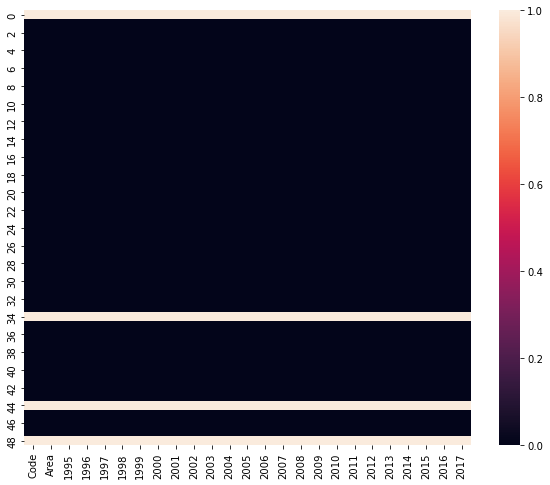

In [18]:
# Kevin
'''
*** House price ***
- Heat Map & Percentage List
'''
### Missing Data Percentage List ###
# The percentage of missing values in each column.
missing_pct(df2)

### Missing Data Heat Map ###
# Use heatmap to show where are those missing values
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df2[:].isnull())

The horizontal axis shows the feature name; the vertical axis shows observations(index of rows). The white color represents the missing data while the black represents the valid data.
<br>As we can see, all the data in these 4 rows are missing, so we choose to remove these rows.

<AxesSubplot:>

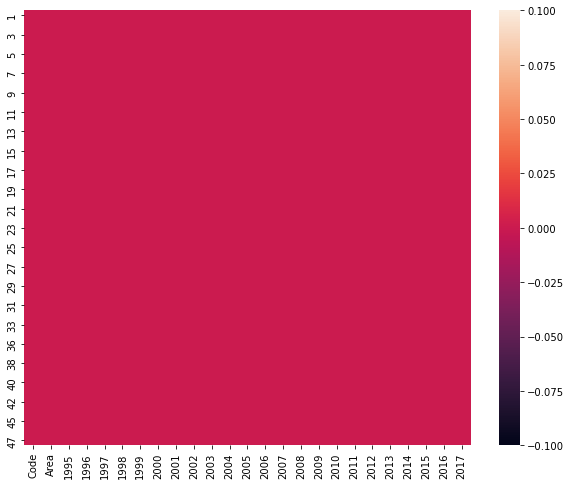

In [19]:
# Kevin
df2_new = df2.drop([0,34,44,48])
# Check by heatmap, after removing missing values
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df2_new.isnull())

<br>

Percentage of missing values:
Unnamed: 0 - 8%
2009 - 8%
2010 - 8%
2011 - 8%
2012 - 8%
2013 - 8%
2014 - 8%
2015 - 8%
2016 - 8%
2017 - 8%


<AxesSubplot:>

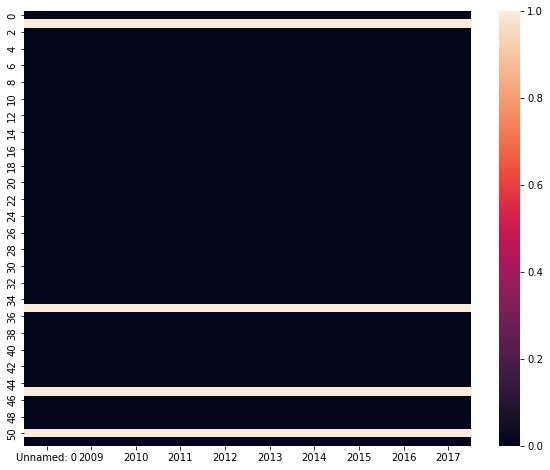

In [20]:
# Ariel
'''
*** Income ***
Heat Map & Percentage List
'''
missing_pct(df3)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df3[:].isnull())

We drop these rows for the same reason.

In [21]:
# Drop missing values
df3_new = df3.dropna()
# fig, ax = plt.subplots(figsize=(10,8))
# sns.heatmap(df3_new.isnull())

<br>

In [22]:
# Giota
'''
*** Crime rate ***
Heat Map & Percentage List
'''
# From previous data overview we found this dataset doesn't has correct column names
# So we creating the headers from the first row
df4.columns = df4.iloc[0] 
# Create a dictionary with the appropriate names 
col_name_dict = {'Borough': 'Boroughs', '2008-09': '2009', '2009-10': '2010', '2010-11': '2011', 
                 '2011-12': '2012', '2012-13': '2013', '2013-14': '2014', '2014-15': '2015', 
                 '2015-16': '2016', '2016-17': '2017'}
 
# call rename () method to rename the existing headers accordingly
df4.rename(columns = col_name_dict, inplace=True)
# df4.head()
df4.drop([0,1], inplace=True)

df4.reset_index(drop=True, inplace=True) # Resetting the index having dropped the first row 

In [23]:
# change data type to numeric ones (except column 1)
df4[df4.columns.values[1:]] = df4[df4.columns.values[1:]].apply(pd.to_numeric, errors='coerce')
df4.dtypes

0
Boroughs     object
2009        float64
2010        float64
2011        float64
2012        float64
2013        float64
2014        float64
2015        float64
2016        float64
2017        float64
dtype: object

<AxesSubplot:xlabel='0'>

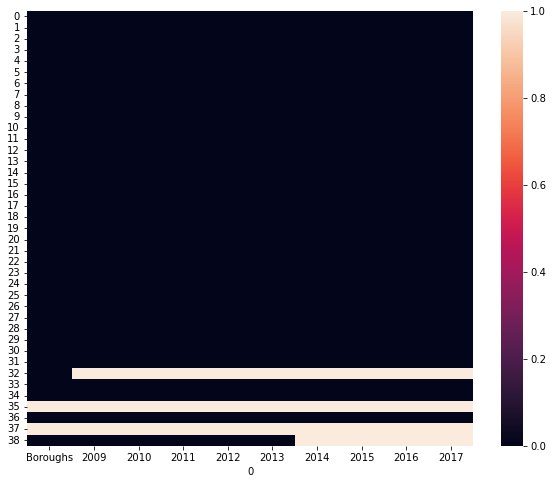

In [24]:
#Giota
### Missing Data Heat Map ###
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df4.isnull())

In [25]:
# Check missing values
df4.iloc[30:]

,Boroughs,2009,2010,2011,2012,2013,2014,2015,2016,2017
30,Wandsworth,85.244899,85.081862,81.696517,79.269442,82.530035,71.625939,72.347787,74.050053,65.831266
31,Westminster,289.615087,295.059452,294.658520,302.005629,277.023828,238.290256,206.946659,203.071412,171.290799
32,Heathrow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Inner London,136.804730,131.833500,129.818005,127.005876,120.290402,107.075293,104.761821,107.775561,92.314553
34,Outer London,88.709505,85.875154,83.420404,80.572925,74.395400,67.146524,68.139935,69.855459,59.844299
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,Met Police Area,108.153301,104.425078,102.085407,99.291271,92.866121,83.265263,83.070012,85.389498,73.202880
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,England and Wales,84.563376,77.460132,74.532850,70.789503,65.962231,NaN,NaN,NaN,NaN


The missing data including blank lines and NaN data in 'Heathrow' and 'England and Wales'. We drop those rows with missing values since our analysis focuses on London boroughs. (last few rows are not London Boroughs)

In [26]:
# Drop missing values
df4_new = df4.dropna()

# Select the data required for the analysis i.e. London Boroughs and drop unnecessary data and set a new dataframe
# new_df4=df4.head(32)
# new_df4.reset_index(drop=True,inplace=True)
# new_df4

<br>

Percentage of missing values:
Area - 8%
Jan 2009-Dec 2009 - 10%
Jan 2010-Dec 2010 - 10%
Jan 2011-Dec 2011 - 10%
Jan 2012-Dec 2012 - 10%
Jan 2013-Dec 2013 - 10%
Jan 2014-Dec 2014 - 10%
Jan 2015-Dec 2015 - 10%
Jan 2016-Dec 2016  - 10%
Jan 2017-Dec 2017  - 10%


<AxesSubplot:>

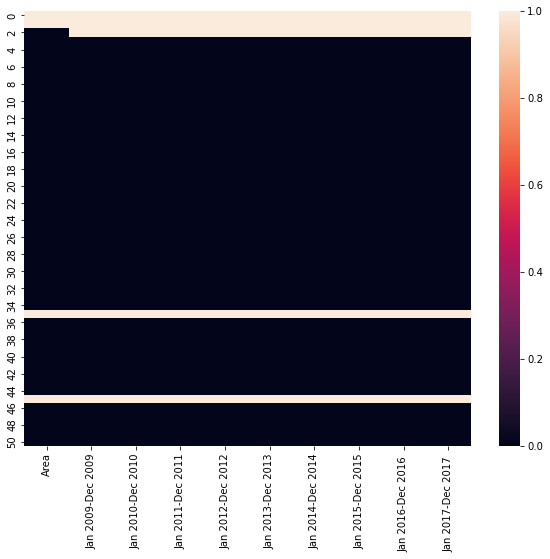

In [27]:
# Kai-Wei
'''
*** Unemployment rate ***

Heat Map & Percentage List
'''
# Convert data into numeric ones
df5[df5.columns.values[1:]] = df5[df5.columns.values[1:]].apply(pd.to_numeric, errors='coerce')
missing_pct(df5)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df5.isnull())

In [28]:
# Check missing values
df5.iloc[:5]
# Here we only check first 5 rows because those rows with all missing values are blank rows 

,Area,Jan 2009-Dec 2009,Jan 2010-Dec 2010,Jan 2011-Dec 2011,Jan 2012-Dec 2012,Jan 2013-Dec 2013,Jan 2014-Dec 2014,Jan 2015-Dec 2015,Jan 2016-Dec 2016,Jan 2017-Dec 2017
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,City of London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Barking and Dagenham,11.9,13.1,13.0,13.5,13.6,10.7,9.7,6.8,7.7
4,Barnet,7.5,7.0,8.0,8.9,6.5,6.4,5.8,4.9,4.4


In [29]:
# Drop these meaningless rows
df5_new = df5.dropna()

In [30]:
# Renaming the columns for 2016 and 2017
df5_new.rename(columns = {'Area':'Boroughs','Jan 2009-Dec 2009':'2009','Jan 2010-Dec 2010':'2010',
                                    'Jan 2011-Dec 2011':'2011','Jan 2012-Dec 2012':'2012',
                                    'Jan 2013-Dec 2013':'2013','Jan 2014-Dec 2014':'2014',
                                    'Jan 2015-Dec 2015':'2015','Jan 2016-Dec 2016 ':'2016',
                                    'Jan 2017-Dec 2017 ':'2017'}, inplace = True)

<br>

<AxesSubplot:>

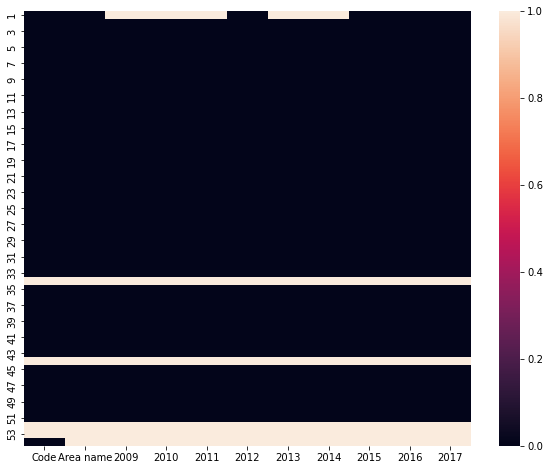

In [31]:
# Aurora
'''
*** Education level ***
Heat Map & Histogram
'''
### Missing Data Heat Map ###
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(new_df6[:].isnull())

In [32]:
### Missing Data Histogram ###
# first create missing indicator for features with missing data
for col in new_df6.columns:
    missing = new_df6[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
#         print('created missing indicator for: {}'.format(col))
        new_df6['{}_ismissing'.format(col)] = missing

# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in new_df6.columns if 'ismissing' in col]
new_df6['num_missing'] = new_df6[ismissing_cols].sum(axis=1)

# Using Bokeh to show figures
missing = new_df6['num_missing'].value_counts().reset_index().sort_values(by='index')
missing.columns = ['num of missing values', 'num of rows']

missing.plot_bokeh.bar(title ="Num of Rows that have Missing Values", figsize =(400,300), 
                       x = 'num of missing values', y = 'num of rows', 
                       xlabel = 'num of missing values', ylabel = 'num of rows')

# Show the missing df
missing

,num of missing values,num of rows
0,0,48
2,5,1
3,10,1
1,11,4


We will drop the entire row as long as it contains more than 4 missing values since there only 9 years.

In [33]:
# drop rows with missing values.
ind_missing = new_df6[new_df6['num_missing'] > 4].index
new_df6.drop(ind_missing, axis=0, inplace=True, errors='ignore')

# drop temporary columns
new_df6.drop([i for i in new_df6.columns.values if 'missing' in i], axis=1, inplace=True, errors='ignore')
# new_df6

<br>

---
### <a name="ch3.2.2">*Step2. Irregular data (Outliers)*</a>

Outliers are numerical values that are significantly different from other observations. They could be real outliers or mistakes. <br>
Here we're using the following methods to detect outliers: <br>
<br>
1. Histogram or Box Plot
2. Scatter Plot 
3. Descriptive Statistics

,2009,2010,2011,2012,2013,2014,2015,2016,2017
IncGeo_BoroughName,,,,,,,,,
CAMDEN,7524,6974,6209.0,NaN,NaN,4887.0,NaN,NaN,NaN
SOUTHWARK,6882,6241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TOWER HAMLETS,7255,6334,5918.0,NaN,NaN,NaN,NaN,NaN,NaN
WESTMINSTER,10018,9429,8171.0,8057.0,7630.0,7143.0,7328.0,7835.0,8028.0


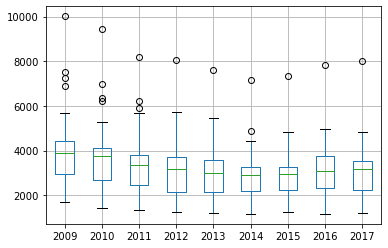

In [34]:
# Aurora
'''
*** LFB Incident ***
- Box Plot
'''
df1_new.boxplot()
 
# print outliers
out = outliers(df1_new)
out

From the box plot and outlier output, we found that all values from WESTMINSTER during these 9 years are signicifant outliers. We decide to remove this borough row from our dataset.

In [35]:
df1_no_outlier = df1_new.drop(['WESTMINSTER'])
# df1_no_outlier

<br>

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Area,,,,,,,,,,,,,,,,,,,,,
City of London,146043.0,NaN,NaN,227377.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Camden,151364.0,168988.0,193421.0,220291.0,NaN,311696.0,339288.0,377033.0,377836.0,411840.0,...,656935.0,600683.0,716429.0,724250.0,780751.0,836170.0,966927.0,1040035.0,1063248.0,1099876.0
Kensington and Chelsea,263462.0,297757.0,347240.0,378450.0,432504.0,558627.0,583952.0,615562.0,660887.0,711106.0,...,1185892.0,1042685.0,1256272.0,1290725.0,1511383.0,1666682.0,1946177.0,1914363.0,1953392.0,2092485.0
Westminster,183338.0,190417.0,228494.0,282269.0,307029.0,374658.0,410251.0,440783.0,457656.0,498794.0,...,781173.0,742745.0,823306.0,958412.0,1147250.0,1299376.0,1464109.0,1361091.0,1579839.0,1718124.0
Hammersmith and Fulham,NaN,NaN,176577.0,NaN,NaN,NaN,NaN,NaN,357956.0,NaN,...,565249.0,555613.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Richmond upon Thames,NaN,NaN,172729.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


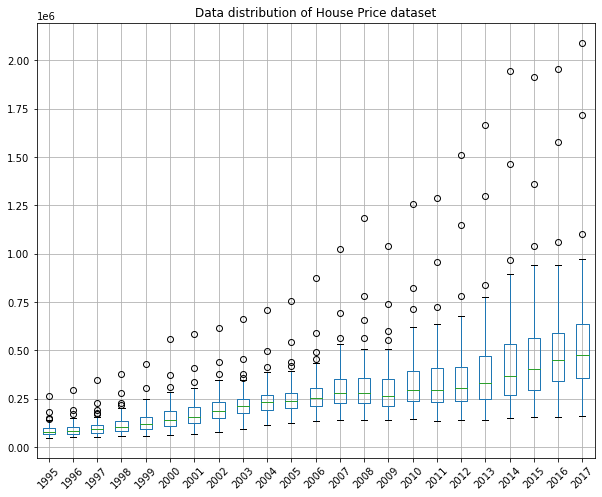

In [36]:
# Kevin
'''
*** House price ***
- Box Plot & Scatter Plot
'''
df2_new = df2_new.set_index('Area')
df2_new.drop('Code', axis=1, inplace=True, errors='ignore')
df2_new = df2_new.apply(pd.to_numeric, errors='ignore')
# Box plot
df2_new.boxplot(figsize=(10, 8))
plt.xticks(rotation=45)
plt.title('Data distribution of House Price dataset')

# Dataframe for outliers
out = outliers(df2_new)
out

In [37]:
# From the box plot we saw many outliers there, so we select those outliers and show in a new dataframe.

# Scatter Plot
# pandas_bokeh.output_file('bokeh plots.html') 
df2_new.T.plot_bokeh(kind='point', title="House price", xlabel = 'Year', ylabel = 'Value', figsize =(700,500))

Figure(id='1144', ...)

We decided to drop "Camden", "Westminster" and "Kensington and Chelsea" since almost all the data in these three rows are significant outliers.

In [38]:
# By observing above dataframe, we decided to drop "Camden", "Westminster" and "Kensington and Chelsea"
# since almost all the data in these three rows are outliers
df2_drop_outlier = df2_new.drop(["Kensington and Chelsea","Westminster","Camden"])

<br>

Text(0.5, 1.0, 'Data distribution of Income dataset')

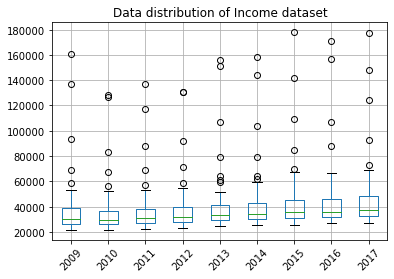

In [39]:
# Ariel
'''
*** Income ***
Box Plot
'''
df3_new.drop([0], inplace=True)
df3_new = df3_new.apply(pd.to_numeric, errors='ignore')
df3_new.boxplot()
plt.xticks(rotation=45)
plt.title('Data distribution of Income dataset')

In [40]:
# Dataframe for outliers
out = outliers(df3_new)
out

,2009,2010,2011,2012,2013,2014,2015,2016,2017
2,137000.0,127000.0,117000.0,131000.0,151000,144000.0,142000.0,157000.0,148000.0
8,68900.0,67100.0,69300.0,71200.0,78900,79200.0,85000.0,88000.0,92600.0
21,161000.0,128000.0,137000.0,131000.0,156000,158000.0,178000.0,171000.0,177000.0
28,58900.0,56300.0,57400.0,58800.0,64000,64600.0,NaN,NaN,NaN
34,93500.0,83400.0,88200.0,92200.0,107000,104000.0,109000.0,107000.0,124000.0
14,NaN,NaN,NaN,NaN,61300,62000.0,69700.0,NaN,73200.0
33,NaN,NaN,NaN,NaN,59900,NaN,NaN,NaN,NaN


We remove the row where the most obvious outliers are located.

In [41]:
# Drop significant outliers
df3_drop_outlier = df3_new.drop([2,21,34])
df3_new.iloc[[2,21,34], 0] # Show borough names

4         Barnet
23       Lambeth
37    North West
Name: Unnamed: 0, dtype: object

<br>

,2009,2010,2011,2012,2013,2014,2015,2016,2017
31,289.615087,295.059452,294.65852,302.005629,277.023828,238.290256,206.946659,203.071412,171.290799


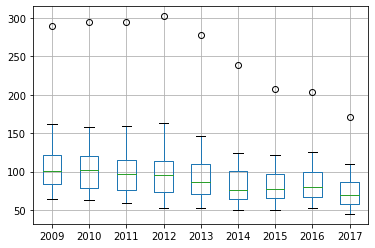

In [42]:
# Giota
'''
*** Crime rate ***
Box Plot
'''
### Box Plot ###
df4_new.boxplot()
# df4_new.max()
# Dataframe for outliers
out = outliers(df4_new)
out

In [43]:
# Get the outlier Borough's name
df4_new.loc[31,'Boroughs']

'Westminster'

From the analysis above we can observe that Westminister Borough is an outlier, recording the highest crime rate consistently over the years compared to other London Boroughs. This is likely because Westminister has a relatively small population and a high number of crimes due to the fact that most protests take place around Parliament and result in criminal offences.

In [44]:
# Drop Westmister row
df4_drop_outlier = df4_new.drop(31)
# df4_drop_outlier.boxplot()

<br>

,2009,2010,2011,2012,2013,2014,2015,2016,2017
3,NaN,13.1,NaN,NaN,13.6,10.7,9.7,NaN,7.7
26,NaN,12.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,NaN,NaN,NaN,NaN,13.1,NaN,NaN,NaN,8.0


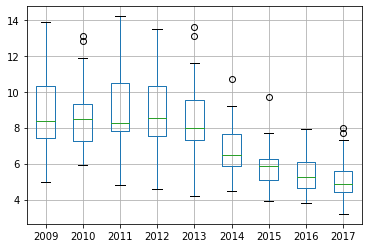

In [45]:
# Kai-Wei
'''
*** Unemployment rate ***

Box Plot
'''
# df5_new.max()
df5_new.boxplot()
out = outliers(df5_new)
out

In [46]:
# Get the outlier Boroughs
df5_new.loc[[3,26,31],'Boroughs']

3     Barking and Dagenham
26                  Newham
31           Tower Hamlets
Name: Boroughs, dtype: object

We consider that these values are not far from the upper whiskers in the box plot and that there are no special reasons for them as in the case of Westminster, so we have kept them here. 

<br>

,2009,2010,2011,2012,2013,2014,2015,2016,2017
22,NaN,NaN,NaN,91.916667,NaN,NaN,96.933333,NaN,NaN
28,NaN,NaN,NaN,89.666667,NaN,NaN,92.900000,NaN,NaN
7,NaN,NaN,NaN,NaN,93.900000,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,94.766667,NaN,NaN,98.416667,NaN
32,NaN,NaN,NaN,NaN,97.550000,NaN,NaN,103.233333,102.483333
13,NaN,NaN,NaN,NaN,NaN,99.216667,99.783333,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.850000,NaN


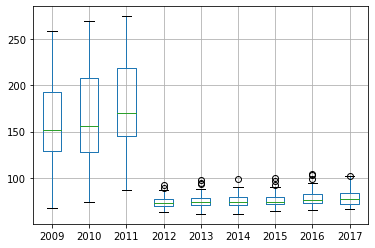

In [47]:
# Aurora
'''
*** Education level ***
Box Plot & Scatter Plot
'''
### Box Plot ###
new_df6.boxplot(column=years)
out = outliers(new_df6)
out

In [48]:
### Scatter Plot ###
new_df6.plot_bokeh(kind='point', title="Data Distribution", xlabel = 'Index of Boroughs', ylabel = 'Value', figsize =(500,400))

Figure(id='3605', ...)

In [49]:
# reset the index
new_df6.reset_index(drop=True, inplace=True)

Based on the above exploration, and considering the goal of this project, we found that there were no particularly obvious outliers in this dataset that needed to be removed, so we retained the original data.

<br>

---
### <a name="ch3.2.3">*Step3. Unnecessary data*</a>

All the data feeding into the model should serve the purpose of the project. Here we will cover three main types of unnecessary data due to different reasons.<br>
1. Irrelevant data
2. Uninformative data
3. Duplicate data


In [50]:
# Aurora
'''
*** LFB Incident ***
'''
### Uninformative data ###
### Sometimes one feature is uninformative because it has too many rows being the same value.
uninformative(df1_no_outlier)

### Duplicates data ###
### Duplicate data is the existence of identical copies of the same observation.
duplicates(df1_no_outlier)

NO Uninformative data in this data set!
NO duplicates data in this data set! Before: (32, 9) After: (32, 9)


This dataset is pretty neat that there's no uncessary data.

In [51]:
boroughs = [i.lower for i in df1_no_outlier.index.values]

<br>

In [52]:
# Kevin
'''
*** House price ***

'''
### Uninformative data ###
uninformative(df2_drop_outlier)

### Duplicates data ###
duplicates(df2_drop_outlier)

NO Uninformative data in this data set!
NO duplicates data in this data set! Before: (42, 23) After: (42, 23)


There's no uninformative or duplicate data in this dataset, but as mentioned before, we just need to keep data from 2009~2017 (columns).

In [53]:
### Irrelevant data ###

years = []
for i in range(2009,2018):
    years.append(str(i))

df2_necessary = df2_drop_outlier[years]
df2_necessary.head(3)

# boroughs_df2 = [i.lower for i in df2_drop_outlier.index.values]
# df2_necessary = df2_drop_outlier.loc[]

,2009,2010,2011,2012,2013,2014,2015,2016,2017
Area,,,,,,,,,
City of London,449611.0,524581.0,541192.0,537160.0,775504.0,894046.0,926292.0,928037.0,950760.0
Barking and Dagenham,166483.0,179018.0,180165.0,181471.0,187943.0,215810.0,244126.0,289176.0,301518.0
Barnet,382143.0,444386.0,440755.0,450269.0,479968.0,534786.0,566874.0,584202.0,667593.0


<br>

In [54]:
# Ariel
'''
*** Income ***
'''
### Uninformative data ###
uninformative(df3_drop_outlier)

### Duplicates data ###
duplicates(df3_drop_outlier)

# df3
# df3.drop([0,1,35,45,50], inplace=True, errors="ignore")
# df3_unnecessary = df3.reset_index(drop=True)[:32]
# df3_unnecessary


NO Uninformative data in this data set!
NO duplicates data in this data set! Before: (44, 10) After: (44, 10)


<br>

In [55]:
# Giota
'''
*** Crime rate ***
'''
### Uninformative data ###
uninformative(df4_drop_outlier)

### Duplicates data ###
duplicates(df4_drop_outlier)


NO Uninformative data in this data set!
NO duplicates data in this data set! Before: (34, 10) After: (34, 10)


<br>

In [56]:
# Kai-Wei
'''
*** Unemployment rate ***
'''
### Uninformative data ###
uninformative(df5_new)

### Duplicates data ###
duplicates(df5_new)

NO Uninformative data in this data set!
NO duplicates data in this data set! Before: (46, 10) After: (46, 10)


<br>

In [57]:
# Aurora
'''
*** Education level ***
'''
### Irrelevant data ###
'''
 The rows other than the London Boroughs are unnecessary for our future analysis and here we choose to drop them all.
 But an easier way to exclude these irrelevant rows is to find the intersection between datasets, 
 since the London Incidents dataset does not have any unnecessary Areas that need to be dropped.
 Therefore, we commented these codes here.
'''
# new_df6.drop([32:], inplace = True, errors='ignore')
new_df6.head()

,Code,Area name,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E09000002,Barking and Dagenham,103.078677,115.811966,124.137931,62.857143,61.271429,61.657143,65.142857,64.957143,74.300000
1,E09000003,Barnet,185.169928,210.727562,223.585405,76.400000,77.942857,75.457143,78.957143,93.366667,92.883333
2,E09000004,Bexley,124.390244,119.520548,116.990702,67.528571,69.100000,72.171429,69.871429,74.471429,72.500000
3,E09000005,Brent,151.188406,118.078791,125.619835,71.042857,84.383333,74.785714,73.928571,85.333333,81.150000
4,E09000006,Bromley,151.260504,166.175604,190.487658,76.971429,77.585714,78.214286,78.571429,79.214286,77.714286


In [58]:
### Uninformative data ###
uninformative(new_df6)

NO Uninformative data in this data set!


In [59]:
### Duplicates data ###
# Drop the 'Code' column, which is the identifier.
# If we do not drop this column, every row would be seen as unique since identifiers are unique.
df6_dedupped = new_df6.drop('Code', axis=1).drop_duplicates()

# Compare if there are duplicate rows
duplicates(df6_dedupped)

NO duplicates data in this data set! Before: (48, 10) After: (48, 10)


In this part, we found that there's not too much unnecessary data that needs to be processed.

---
### <a name="ch3.2.4">*Step4. Inconsistent data*</a>

The last step is to standardise our data to make it more explicit so that it can be used as suitable model input.<br>
* Our datasets contain mainly **numeric** data, and in order to keep the data consistent, we truncate the values to **two decimal places**. 
* In addition, we have standardised the row names to be **capitalised** and column names to be **string** types.
* Finally, we save those cleaned datasets under **Data/Clean/** folder so that they can be further used.

In [60]:
# Aurora
'''
*** LFB Incident ***
'''
df1_no_outlier.index.rename('Boroughs', inplace=True)
df1_no_outlier.columns.rename('', inplace=True)

df1_clean = df1_no_outlier.rename(index=str.title, columns=str)
### Check data type ###
print(df1_clean.dtypes) # types of values inside the dataset
print(df1_clean.index.dtype) # type of index
print(df1_clean.columns.dtype) # type of columns
df1_clean.head(3)


2009    int64
2010    int64
2011    int64
2012    int64
2013    int64
2014    int64
2015    int64
2016    int64
2017    int64
dtype: object
object
object


,2009,2010,2011,2012,2013,2014,2015,2016,2017
Boroughs,,,,,,,,,
Barking And Dagenham,2957,2696,2433,2101,2057,1929,2121,2216,2187
Barnet,4124,3886,3707,3511,3236,2986,3266,3425,3540
Bexley,2726,2410,2114,1962,1920,1933,2044,2086,2251


In [61]:
df1_clean.to_csv('Data/Clean/London Incidents.csv', index_label='Boroughs')

In [62]:
### Summarize chart of Qualification Level Dataset ###
# Using bokeh to show figures
df1_clean.T.plot_bokeh(kind="line",title ="Number of Incidents in 2009-2017", figsize =(800,400), xlabel = "Year", ylabel="Number of Incidents")

Figure(id='4136', ...)

<br>

In [63]:
# Kevin
'''
*** House price ***
'''
df2_necessary.index.rename('Boroughs', inplace=True)
df2_necessary.rename(index=str.title, columns=str, inplace=True)
### Check data type ###
print(df2_necessary.dtypes) # types of values inside the dataset
print(df2_necessary.index.dtype) # type of index
print(df2_necessary.columns.dtype) # type of columns

df2_necessary.to_csv('Data/Clean/House Price.csv')

# Display the summarize line graph
df2_necessary.T.plot_bokeh(kind="line",title ="House price", figsize =(800,400), xlabel = "Year", ylabel="house price")

2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
dtype: object
object
object


Figure(id='6309', ...)

<br>

In [64]:
# Ariel
'''
*** Income ***
'''
# Check column names
df3_drop_outlier.columns.values

array(['Unnamed: 0', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'], dtype=object)

In [65]:
# Change the first column's name to 'Boroughs'
df3_drop_outlier.columns = ['Boroughs', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
# df3_drop_outlier.Boroughs

In [66]:
# We can see the values in 'Boroughs' column are not in the same format, some values have '-' between words.
# Replace '-' with ' '(whitespace)
df3_drop_outlier['Boroughs'] = df3_drop_outlier['Boroughs'].str.replace('-', ' ')
df3_clean = df3_drop_outlier.set_index('Boroughs', drop=True, append=False, verify_integrity=False)
df3_clean.rename(index=str.title, columns=str, inplace=True)
# df3_clean

### Check data type ###
print(df3_clean.dtypes) # types of values inside the dataset
print(df3_clean.index.dtype) # type of index
print(df3_clean.columns.dtype) # type of columns


2009    int64
2010    int64
2011    int64
2012    int64
2013    int64
2014    int64
2015    int64
2016    int64
2017    int64
dtype: object
object
object


In [67]:
df3_clean.to_csv('Data/Clean/Income.csv', index_label='Boroughs')
# Show figure by year 
df3_clean.T.plot_bokeh(kind="line",title ="Income", figsize =(800,400), xlabel = "Year", ylabel="Income")


Figure(id='9592', ...)

<br>

In [68]:
# Giota
'''
*** Crime rate ***
'''
# Set Boroughs as the index of this dataset
df4_clean = df4_drop_outlier.set_index('Boroughs', drop=True, append=False, verify_integrity=False)
df4_clean = df4_clean.round(2)

In [69]:
### Check data type ###
print(df4_clean.dtypes) # types of values inside the dataset
print(df4_clean.index) # type of index
print(df4_clean.columns) # type of columns

0
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
dtype: object
Index(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Inner London',
       'Outer London', 'Met Police Area'],
      dtype='object', name='Boroughs')
Index(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'], dtype='object', name=0)


In [70]:
#Save clean data file
df4_clean.rename(index=str.title, columns=str, inplace=True)
df4_clean.to_csv('Data/Clean/Crime Rate.csv', index_label='Boroughs')

In [71]:
# Using bokeh to show figures
df4_clean.T.plot_bokeh(kind="line",title ="Crime rate (Offences per thousand population)", figsize =(800,400), xlabel = "Year", ylabel="Crime rate")

Figure(id='13197', ...)

<br>

In [72]:
# Kai-Wei
'''
*** Unemployment rate ***
'''
# fixing label names and resetting index
df5_clean = df5_new.set_index('Boroughs', drop=True, append=False, verify_integrity=False)
df5_clean.rename(index=str.title, columns=str, inplace=True)
df5_clean = df5_clean.round(2)
# df5_clean

### Check data type ###
print(df5_clean.dtypes) # types of values inside the dataset
print(df5_clean.index.dtype) # type of index
print(df5_clean.columns.dtype) # type of columns


2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
dtype: object
object
object


In [73]:
# write and save to 'Clean' folder
df5_clean.to_csv('Data/Clean/Unemployment.csv', index_label='Boroughs')
df5_clean.T.plot_bokeh(kind="line",title ="Unemployment rate", figsize =(800,400), xlabel = "Year", ylabel="Unemployment rate")


Figure(id='15816', ...)

<br>

In [74]:
# Aurora 
'''
*** Education level ***
'''
new_df6.reset_index(drop=True, inplace=True)

# Set Boroughs as the index of this dataset
df6_clean = df6_dedupped.set_index('Area name', drop=True, append=False, verify_integrity=False)
df6_clean = df6_clean.round(2)
df6_clean.index.rename('Boroughs', inplace=True)
df6_clean.rename(index=str.title, columns=str, inplace=True)


In [75]:
df6_clean.head(3)

,2009,2010,2011,2012,2013,2014,2015,2016,2017
Boroughs,,,,,,,,,
Barking And Dagenham,103.08,115.81,124.14,62.86,61.27,61.66,65.14,64.96,74.30
Barnet,185.17,210.73,223.59,76.40,77.94,75.46,78.96,93.37,92.88
Bexley,124.39,119.52,116.99,67.53,69.10,72.17,69.87,74.47,72.50


In [76]:
df6_scale = scale(df6_clean)
df6_scale.head(3)

,2009,2010,2011,2012,2013,2014,2015,2016,2017
Boroughs,,,,,,,,,
Barking And Dagenham,19.62,25.59,29.50,0.75,0.00,0.18,1.82,1.73,6.11
Barnet,58.13,70.12,76.15,7.10,7.82,6.66,8.30,15.06,14.83
Bexley,29.61,27.33,26.14,2.94,3.67,5.11,4.03,6.19,5.27


In [77]:
### Check data type ###
(df6_clean.dtypes) # types of values inside the dataset
(df6_clean.index) # type of index
(df6_clean.columns) # type of columns

Index(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'], dtype='object')

In [78]:
df6_clean.to_csv('Data/Clean/Education.csv', index_label='Boroughs')

In [79]:
'''
### Summarize chart of Qualification Level Dataset ###
Below is an overview line plot of this Education Level dataset. <br>
We can see how educational levels have changed over time in each London borough.
'''
df6_clean['2009'].idxmax()
df6_clean['2009'].idxmin()

# Using bokeh to show figures
df6_clean.T.plot_bokeh(kind="line",title ="Education levels", figsize =(800,400), xlabel = "Year", ylabel="Education score")


Figure(id='19829', ...)

---
***Okay!!!*** <br>*Now we've finished the data processing part!*<br>*Let's move to the next chapter!*

<br>

----

## <a name="ch3.3">3.3 Data Exploration</a>

### <a name="ch3.3.1">3.3.1 Dataset Integration</a>

In [85]:
# Aurora
'''
# Integrate all the 6 datasets into one master dataset.
# Based on our question, the dependent and independent variabels are defined as follows: 
# Dependent Variable Y: 'Number of Incidents'
# Independent Variables X: 'Crime Rate', 'Education', 'House Price', 'Income', 'Unemployment'
'''
path = "Data/Clean" 
files= os.listdir(path)
s = []
first_df = True

df_full = pd.DataFrame()
for file in files:
    if not os.path.isdir(file): 
        if ".DS_Store" not in file:
            if file != 'Master.csv':
                print(file)
                df = pd.read_csv(path + '/' + file, index_col='Boroughs') 
                df = df.stack()
                df.index = df.index.rename('Year', level=1)
                df.name = file[:-4]
    #             df.head()
                if first_df:
                    df_full = df
                    first_df = False
                else: 
                    df_full = pd.merge(df_full, df, how='inner', left_on = ['Boroughs','Year'], right_on = ['Boroughs','Year'])
        #             df_full.head()

        
df_full.index.value_counts
df_full = df_full[['London Incidents', 'Crime Rate', 'Education', 'House Price', 'Income', 'Unemployment']]
df_full.to_csv('Data/Clean/Master.csv')
df_full.head(15)


Income.csv
Education.csv
London Incidents.csv
House Price.csv
Crime Rate.csv
Unemployment.csv


London Incidents  Crime Rate  Education  \
Boroughs             Year                                            
Barking And Dagenham 2009              2957      115.90     103.08   
                     2010              2696      111.74     115.81   
                     2011              2433      104.89     124.14   
                     2012              2101      100.65      62.86   
                     2013              2057       90.47      61.27   
                     2014              1929       82.86      61.66   
                     2015              2121       81.87      65.14   
                     2016              2216       86.53      64.96   
                     2017              2187       70.90      74.30   
Barnet               2009              4124       77.75     185.17   
                     2010              3886       75.97     210.73   
                     2011              3707       73.13     223.59   
                     2012              3511       73.51      76.40   
                     2013              3236       69.69      77.94   
                     2014              2986       61.57      75.46   

                           House Price  Income  Unemployment  
Boroughs             Year                                     
Barking And Dagenham 2009     166483.0   23100          11.9  
                     2010     179018.0   22500          13.1  
                     2011     180165.0   22800          13.0  
                     2012     181471.0   23700          13.5  
                     2013     187943.0   24600          13.6  
                     2014     215810.0   25500          10.7  
                     2015     244126.0   25900           9.7  
                     2016     289176.0   26700           6.8  
                     2017     301518.0   27400           7.7  
Barnet               2009     382143.0   41600           7.5  
                     2010     444386.0   38800           7.0  
                     2011     440755.0   39200           8.0  
                     2012     450269.0   41000           8.9  
                     2013     479968.0   45500           6.5  
                     2014     534786.0   45800           6.4

<br>

### <a name="ch3.3.2">3.3.2 Descriptive Analysis</a>

* ***Descriptive Table***

In [86]:
# Aurora

df_full = pd.read_csv('Data/Clean/Master.csv')
df_full = df_full.set_index(['Boroughs','Year'])
features = [i for i in df_full.columns.values if i!='London Incidents']

# Normalize feature values to [0, 100]
max_min_scaler = lambda x : (x-np.min(x))/(np.max(x)-np.min(x))*100
df_scaled = df_full.copy()
df_scaled[features] = df_scaled[features].apply(max_min_scaler)
df_scaled.describe()

,London Incidents,Crime Rate,Education,House Price,Income,Unemployment
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,3146.160920,37.074750,23.661336,31.467274,32.031395,38.533114
std,1050.988907,20.807888,25.491798,19.020206,20.429113,23.193709
min,1320.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2310.000000,21.896999,6.408632,17.016238,17.669903,20.952381
50%,3093.000000,33.493887,9.519118,27.728272,26.796117,34.285714
75%,3731.000000,51.843275,41.491907,42.285429,42.330097,56.190476
max,7255.000000,100.000000,100.000000,100.000000,100.000000,100.000000


It is apparent from the above table that the median of the Education dataset is very small and deviates significantly from the mean, which means it is a left-skewed dataset.

<br>

* ***Scatter Plot***

In [87]:
### Scatter Plot ###
# Summarize Plot
# Separate features
colors = ['#58D68D', '#FE9A4B', '#F4D03F', '#5DADE2', '#C39BD3']
s = [None]*5
i = 0
for feature in features:
    p = figure(width=200, height=200)
    p.circle(df_full[feature], df_full['London Incidents'], size=7, color=colors[i], alpha=0.5)
    p.title.text = 'Incidents vs '+feature
    p.title.text_font_size = "15px"
    s.append(p)
    i+=1

# show the results
grid = gridplot(s, ncols=3, width=300, height=250)
show(grid)


These scatter plots above present the data in a visual format. 
<br>We can observe a relatively clear relationship between Crime Rates and Incidents. 
<br>However, for the Education dataset, we can see that the data is concentrated on the left and that it is more dispersed.

<br>

* ***Correlation Plot***

Text(0.5, 1.0, 'Correlation Heatmap')

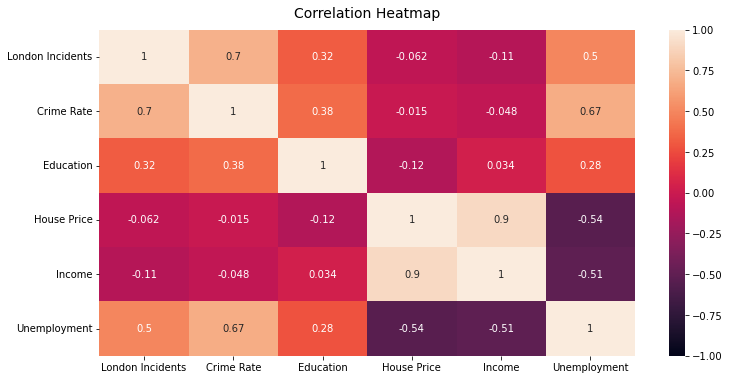

In [88]:
#Correlation plot
plt.figure(figsize=(12, 6))
correlation = sns.heatmap(df_full.corr(), vmin=-1, vmax=1, annot=True)
correlation.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

From the above correlation heatmap, **crime rate and unemployment** have the highest correlation with fire incidents, with coefficients of 0.74 and 0.49 respectively. This indicates that areas with more crime and unemployment have a higher number of fire incidents. These two variables (crime rate and unemployment) also have a strong relationship with each other, with a coefficient of 0.71. **Income and house price** have a negative relationship with fire incidents (–0.1 and –0.051 coefficients), showing that there are fewer fire incidents in boroughs with higher income and house prices. 

---
<br>
<br>

---

# <center><a name="ch4">Chapter 4&nbsp;&nbsp;&nbsp;&nbsp;Methods and Implementation</a></center>

Quick Access: &nbsp;&nbsp; <a href='#ch4.1'>Linear Regression</a> &nbsp; &nbsp; &nbsp; <a href='#ch4.2'>XGBoost Regression</a>

## <a name="ch4.1">4.1 Linear Regression</a> 

In [89]:
# Aurora
'''
# Step1: Import df and transform it into the right format.
'''
df = pd.read_csv('Data/Clean/Master.csv', index_col = ['Boroughs', 'Year'])
# df = df.set_index(['Boroughs','Year'])
years = df.index.get_level_values('Year').to_list()
df['Year'] = pd.Categorical(years)
df

boroughs = list(set(i[0] for i in df.index.values))
Y = 'London Incidents'

max_min_scaler = lambda x : (x-np.min(x))/(np.max(x)-np.min(x))*100
df_scaled = df.copy()
df_scaled[features] = df_scaled[features].apply(max_min_scaler)
# df_scaled.describe()

X = df[['Crime Rate', 'Education', 'House Price', 'Income', 'Unemployment']]
y = df[['London Incidents']]

In [90]:
'''
# Step 2: Start with PooledOLS and check required assumptions
# Perform PooledOLS, which is a simple OLS model
'''
exog = sm.tools.tools.add_constant(X)
endog = y
mod = PooledOLS(endog, exog)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)
# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

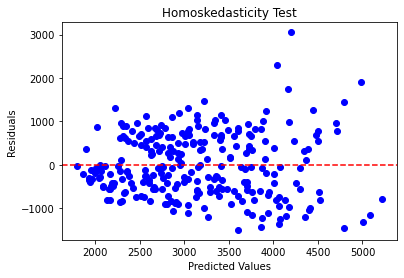

In [91]:
'''
3A. Homoskedasticity
3A.1 Residuals-Plot for growing Variance Detection
If the plotted data points spread out, this is an indicator for growing variance and thus, for heteroskedasticity.
 '''   
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Residuals')
ax.set_title('Homoskedasticity Test', fontsize = 12)
plt.show()

In [92]:
'''
# 3A.2 White-Test
# if p < 0.05, then heteroskedasticity is indicated.
'''
pooled_OLS_df = pd.concat([df, residuals_pooled_OLS], axis=1)
pooled_OLS_df = pooled_OLS_df.drop(['Year'], axis = 1).fillna(0)
exog = sm.tools.tools.add_constant(X).fillna(0)
white_test_results = het_white(pooled_OLS_df['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))
# 3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_df['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, breusch_pagan_test_results)))

{'LM-Stat': 106.32018002464515, 'LM p-val': 9.162850762691195e-14, 'F-Stat': 8.248278026823552, 'F p-val': 3.850826723391079e-18}
{'LM-Stat': 49.452684130740586, 'LM p-val': 1.793328907554299e-09, 'F-Stat': 11.922093552945249, 'F p-val': 2.2212570110475597e-10}


In [93]:
'''
# 3.B Non-Autocorrelation
# Durbin-Watson-Test
# The Durbin-Watson-Test will have one output between 0~4. 
# The mean (= 2) would indicate that there is no autocorrelation identified, 
# 0~2 means positive autocorrelation (the nearer to zero the higher the correlation), 
# and 2~4 means negative autocorrelation (the nearer to four the higher the correlation).
'''
durbin_watson_test_results = durbin_watson(pooled_OLS_df['residual']) 
print(durbin_watson_test_results)


0.4128613310901081


In [94]:
'''
# Our result is 0.4128613310901081, which clearly indicates high positive autocorrelation.
# As a consequence, assumption 3b is also violated, so it seems that a FE-/RE-model will be more suitable.
'''
# Step 3: Perform FE- and RE-model
# FE und RE model
exog = sm.tools.tools.add_constant(X)
endog = y
# random effects model
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 
# fixed effects model
model_fe = PanelOLS(endog, exog, entity_effects = True) 
fe_res = model_fe.fit() 
#print results
print(re_res)
print(fe_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:       London Incidents   R-squared:                        0.5687
Estimator:              RandomEffects   R-squared (Between):              0.4135
No. Observations:                 261   R-squared (Within):               0.5847
Date:                Mon, Dec 12 2022   R-squared (Overall):              0.4387
Time:                        01:37:49   Log-likelihood                   -1839.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      67.258
Entities:                          29   P-value                           0.0000
Avg Obs:                       9.0000   Distribution:                   F(5,255)
Min Obs:                       9.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             67.258
                            

In [95]:
'''
# Step 4: Perform Hausman-Test
# test which model should be preferred
# H0 = RE-model is better
# H1 = FE-model is better
# if the p-value is very small, the null hypothesis can be rejected. 
# According to our result, the FE-model(Panel OLS) seems to be the most suitable. 
'''
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 

    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval
hausman_results = hausman(fe_res, re_res) 
print('chi-Squared: ' + str(hausman_results[0]))
print('degrees of freedom: ' + str(hausman_results[1]))
print('p-Value: ' + str(hausman_results[2]))

chi-Squared: 4.411791868656657
degrees of freedom: 6
p-Value: 0.6211332200797322


We used two linear models for the regression analysis: **Random Effects and Panel OLS**. The summary results for both models are very consistent and similar in terms of P-values and coefficients. 
* The summary results of the linear regression analysis show that the P-values for Crime rate and Education are 0 indicating that these predictor values are statistically significant.  
* The P-values for House price, Income and Unemployment are higher than 0.05 which means they are not statistically significant.  
* The Crime rate and Education coefficients show a strong positive relationship with the dependent variable: Number of Fire Incidents. 
* The coefficients for House Price and Income are zero, however, the coefficient for Unemployment is negative and the P-value is high, meaning that it is a factor we should drop or at least carefully consider going forward.  

In [96]:
'''
Rerun the linear regression: Removing Unemployment feature due to the colinearity.
We use FE model(Panel OLS Regression) here.
'''
# FE und RE model
exog = sm.tools.tools.add_constant(X[['Crime Rate', 'Education', 'House Price', 'Income']])
endog = y
# fixed effects model
model_fe = PanelOLS(endog, exog, entity_effects = True) 
fe_res = model_fe.fit() 
#print results
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:       London Incidents   R-squared:                        0.5862
Estimator:                   PanelOLS   R-squared (Between):              0.3567
No. Observations:                 261   R-squared (Within):               0.5862
Date:                Mon, Dec 12 2022   R-squared (Overall):              0.3906
Time:                        01:37:49   Log-likelihood                   -1821.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      80.742
Entities:                          29   P-value                           0.0000
Avg Obs:                       9.0000   Distribution:                   F(4,228)
Min Obs:                       9.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             80.742
                            

---
<br>



## <a name="ch4.2">4.2 XGBoost Regression</a>

In [97]:
# Kai
df_full = pd.read_csv('Data/Clean/Master.csv')
df_full

,Boroughs,Year,London Incidents,Crime Rate,Education,House Price,Income,Unemployment
0,Barking And Dagenham,2009,2957,115.90,103.08,166483.0,23100,11.9
1,Barking And Dagenham,2010,2696,111.74,115.81,179018.0,22500,13.1
2,Barking And Dagenham,2011,2433,104.89,124.14,180165.0,22800,13.0
3,Barking And Dagenham,2012,2101,100.65,62.86,181471.0,23700,13.5
4,Barking And Dagenham,2013,2057,90.47,61.27,187943.0,24600,13.6
...,...,...,...,...,...,...,...,...
256,Wandsworth,2013,3162,82.53,97.55,584510.0,59900,7.5
257,Wandsworth,2014,2956,71.63,86.26,681731.0,59200,4.9
258,Wandsworth,2015,2948,72.35,83.74,687589.0,63600,5.0
259,Wandsworth,2016,3445,74.05,103.23,775484.0,64900,4.7


In [98]:
print(df_full.keys)

<bound method NDFrame.keys of                  Boroughs  Year  London Incidents  Crime Rate  Education  \
0    Barking And Dagenham  2009              2957      115.90     103.08   
1    Barking And Dagenham  2010              2696      111.74     115.81   
2    Barking And Dagenham  2011              2433      104.89     124.14   
3    Barking And Dagenham  2012              2101      100.65      62.86   
4    Barking And Dagenham  2013              2057       90.47      61.27   
..                    ...   ...               ...         ...        ...   
256            Wandsworth  2013              3162       82.53      97.55   
257            Wandsworth  2014              2956       71.63      86.26   
258            Wandsworth  2015              2948       72.35      83.74   
259            Wandsworth  2016              3445       74.05     103.23   
260            Wandsworth  2017              3205       65.83     102.48   

     House Price  Income  Unemployment  
0       166483.0

In [99]:
X = df_full[['Crime Rate', 'Education','House Price','Income','Unemployment']]
y = df_full[['London Incidents']]
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [100]:
#random state is like 'seed' in r
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888)
print(X_train)

     Crime Rate  Education  House Price  Income  Unemployment
252       85.24     258.17     459109.0   52800           6.3
155       70.28     215.28     364948.0   38700           6.6
156       70.01      79.74     383982.0   39900           6.3
69        68.73      75.26     389903.0   34600           5.9
255       79.27      86.50     532430.0   54700           6.6
..          ...        ...          ...     ...           ...
109       65.92     145.67     331517.0   31100           6.6
188       53.52      81.79     638519.0   54600           4.1
115       53.31      79.20     504811.0   38400           4.8
150      118.64      82.94     743764.0   58900           6.4
239       99.45      83.68     445319.0   41800           8.7

[208 rows x 5 columns]


In [101]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)


[01:37:49] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [102]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 1504.987263


In [103]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=888)


[01:37:50] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[01:37:50] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[01:37:50] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [104]:
new_matrix_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[01:37:50] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

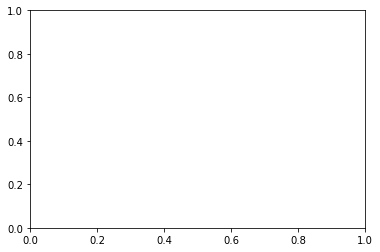

In [105]:
xgb.plot_tree(new_matrix_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [40, 60]
plt.show()

Below, we're looking at the feature importance in df_full in three different options: **weight, cover and gain**

In [ ]:
xgb.plot_importance(new_matrix_reg)
plt.rcParams['figure.figsize'] = [10, 9]
plt.show()

In [ ]:
xgb.plot_importance(new_matrix_reg, importance_type = "cover")
plt.rcParams['figure.figsize'] = [10, 9]
plt.show()

In [ ]:
xgb.plot_importance(new_matrix_reg, importance_type = "gain")
plt.rcParams['figure.figsize'] = [10, 9]
plt.show()

The simplest way to measure a feature’s importance is to use XGBoot’s plot_importance which shows an ordered ranking of importance for each feature. However, there are three different options to rank the features in XGBoost and the results all differ depending on which is chosen. 

First is the standard **‘weight’** which is the ‘number of times a feature is used to split data across all trees’ (Lundberg, 2020). Here we can see from the results that **Income and House price** are the most important. 

Next is the feature importance using **‘cover’** which is ‘the number of times a particular feature is used to split data across all trees weighted by the number of training data that go through those splits’. For this option, **Unemployment** was the most important feature. 

Finally, **‘gain’** is the average time of train loss reduced when using a particular feature for splitting which in this case is the **Crime Rate**. 

In [ ]:
shap_tree = shap.TreeExplainer(xg_reg).shap_values(X)
shap.summary_plot(shap_tree, X)

*SHAP* (Shapely Additive Explanations) is used to evaluate the output of our XGBoost model (shap.readthedocs.io, 2022). We can infer the following statements from the visualization of SHAP: 

* Crime rate and incidents are positively correlated; lower CR = less incidents and higher CR = more incidents 

* Unemployment also has the same effect as the crime rate but has less impact on the output

* Higher income means that fire incidents are less 

* Lower house price results in more fire incidents 

* Education has no effect on the model output (is not used by the model) 

---
<br>
<br>
<br>

---

# <center><a name="ch5">Chapter 5&nbsp;&nbsp;&nbsp;&nbsp;Conclusion and Limitations</a></center>

## <a name="ch5.1">5.1 Conclusion</a>

The results of all the models we employed are largely consistent showing that areas with high Crime and Unemployment rate are associated with large numbers of Fire Incidents. Similarly, areas with higher average House prices and Income are associated with lower numbers of Fire Incidents but their impact is significantly lower. We found unemployment Rate also has a high coefficient but due to the high p-value in Panel OLS means that this may not be trustworthy. Therefore, we decided to drop the Unemployment Rate from the final Panel OLS Regression in order to get a more reliable outcome. The decision tree shows that the Crime Rate is the most significant feature as we also confirmed in the final Panel OLS Regression. Also, there is another interesting point that Education Level has a positive relationship with the Incidents. This is consistent with our previous findings from the descriptive analysis, where the data were grossly uneven and extremely discrete, which is one of the main reasons. Therefore, we don’t consider the coefficient of the Education feature. 

### Business value 

The benefits for the London Fire Brigade service from the above study can be summarized as follows: 

* **Forward resource planning**: LFB can plan ahead and allocate resources by considering socioeconomic factors such as Crime rate and average Income for each borough they serve.  

* **Proactive response to pop-ups**: LFB can proactively adjust the level of response to areas that present high crime rates such as offences and protests. 

* **Flexible and adjustable coverage of London Boroughs**: LFB can adjust the flex resource and level of response for each London Borough in accordance with socioeconomic factors. 

## <a name="ch5.2">5.2 Limitations</a>

To make sure all the data have the same time period and borough, we adjusted all the time periods to make them start from 2009 to 2017 and the total borough 32 so it can be easier to compare and more accurate but on the other hand, this is a limitation to our project because we would gain additional insight into the result.   

The dataset we found has many variables, but the total data only has around 300 which may lead to the possibility of our data being skewed or not accurate. The limitation could be omitted by gathering more data and time to explore.

## <a name="ch5.3">5.3 Further works</a>

Several improvements we have identified that can increase the accuracy and the business value of our model and analysis. A few ideas below: 

* **Increase sample size**: A greater number of years' worth of data for the socioeconomic factors we examined would increase the model's accuracy and add more confidence to our results. 

* **More in-depth analysis of the LFB dataset**: The LFB dataset includes other attributes such as False alarms, time and date of events, type of dwelling etc. There are many dimensions we could expand our analysis to understand their impact and provide meaningful and granular results on the frequency, time and severity of events. 

## <center>Thanks to all the group members for their dedication!!!</center>

---

# <a name="references">References</a>

Lundberg, S. (2020). Interpretable Machine Learning with XGBoost. [online] Medium. Available at: https://towardsdatascience.com/interpretable-machine-learning-with-xgboost-9ec80d148d27. 

shap.readthedocs.io. (n.d.). Welcome to the SHAP Documentation — SHAP latest documentation. [online] Available at: https://shap.readthedocs.io/en/latest/. 

CN, P. (2022) EDA - exploratory data analysis: Using python functions, DigitalOcean. DigitalOcean. Available at: https://www.digitalocean.com/community/tutorials/exploratory-data-analysis-python (Accessed: December 10, 2022). 

Annotations# (no date) Annotations - Matplotlib 3.6.2 documentation. Available at: https://matplotlib.org/stable/tutorials/text/annotations.html (Accessed: December 10, 2022). 

Heading 1 (no date) Markdown Reference. Available at: https://commonmark.org/help/ (Accessed: December 10, 2022). 

Aichara, D.C. (2019) 12 things to know about jupyter notebook markdown., Medium. Game of Data. Available at: https://medium.com/game-of-data/12-things-to-know-about-jupyter-notebook-markdown-3f6cef811707 (Accessed: December 10, 2022). 

Pavansanagapati (2020) Pandas bokeh visualization tutorial, Kaggle. Kaggle. Available at: https://www.kaggle.com/code/pavansanagapati/pandas-bokeh-visualization-tutorial (Accessed: December 10, 2022). 

Ray, S. (2022) Commonly used machine learning algorithms: Data science, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/ (Accessed: December 10, 2022). 

Real Python (2022) Pythonic data cleaning with pandas and NumPy, Real Python. Real Python. Available at: https://realpython.com/python-data-cleaning-numpy-pandas/ (Accessed: December 10, 2022). 

---

# <a name="appendix">Appendix</a>

## <a name="utils">utils.py</a>

In [ ]:
'''
Author: Aurora Yin
Created: 27/10/2022
File description:
Useful tools for MSIN0143 group project.
'''

import os
import math
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from pandas import Series, DataFrame 

# # Using Bokeh Visualisation 
import pandas_bokeh
pandas_bokeh.output_notebook() # show in notebook
# pandas_bokeh.output_file('bokeh plots.html') 
from bokeh.models import ColumnDataSource, Whisker
from bokeh.plotting import figure, show
from bokeh.sampledata.autompg2 import autompg2
from bokeh.transform import factor_cmap
from bokeh.layouts import gridplot

import numpy.linalg as la
from scipy import stats
from linearmodels import PooledOLS
import statsmodels.api as sm
from linearmodels import PanelOLS
from linearmodels import RandomEffects
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_white, het_breuschpagan


import shap
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import *


'''
Description:
Function to convert .xlsx file to .csv file

Argument(s):
fn - file name or path including file name

Return:
.csv filename

'''
def xlsx_to_csv_pd(fn):
    
    assert '.xlsx' in fn, "The file is not a .xlsx file!"
    
    data_xls = pd.read_excel(fn, index_col=0)
    csv_fn = fn.replace('.xlsx', '.csv') #replace excel document to csv file
    data_xls.to_csv(csv_fn, encoding='utf-8')
    
    return csv_fn


'''
Description:
Function to convert all .xlsx file in a folder into .csv file and store in a specific folder

Argument(s):
fp - folder path

Return:
By default

'''
def xlsx_to_csv_folder(fp1, fp2):
    
    for path, dns, fns in os.walk(fp1): # path--filepath  dns--dirnames  fns--filenames
        for fn in fns:
            if '.xls' in fn:
                data_xls = pd.read_excel(fp1 + '/' + fn, index_col=0)
                csv_fn = fn.replace(fn.split('.')[1], 'csv')
                if csv_fn not in fns:
                    data_xls.to_csv(fp2 + '/' + csv_fn, encoding='utf-8')
                
                # shutil.move(fp1 + '/' + fn,fp2) 
                print("Done with " + fn)
                
    print("Done!!")
    
    return 


'''
Description:
Get basic information of the file.

Argument(s):
csv_fn - filename

Return:
df - dataframe
'''
def get_data_info(csv_fn):
    df = pd.read_csv(csv_fn)
    print("Shape of Dataset:")
    print(df.shape)
    print("\nInfo of Dataset:")
    print(df.info())
    print("\nFirst 5 rows of Dataset:\n")
    print(df.head())
    
    return df


'''
Description:
Calculate the missing rate of each column in a dataframe.
Print out a list of percentages.

Argument(s):
df - dataframe

Return:
By default
'''
def missing_pct(df):
    print('Percentage of missing values:')

    for col in df.columns:
        pct_missing = np.mean(df[col].isnull()) #replace missing value with average values
        print('{} - {}%'.format(col, round(pct_missing*100)))
    return 


'''
Description:
Find the outliers of the dataframe.

Argument(s):
df - dataframe

Return:
res - a new dataframe which contains only the outliers' values with their row&column indexes.
'''
def outliers(df):
    outliers = []
    for year in df.columns.values:
        if str(year).isdigit():
            Q1 = df[year].quantile(0.25)
            Q3 = df[year].quantile(0.75)
            IQR = Q3 - Q1    #IQR is interquartile range. 

            filter = (df[year] >= Q1 - 1.5 * IQR) & (df[year] <= Q3 + 1.5 *IQR)
            s = df.loc[~filter][year]
            outliers.append(s)
    res = pd.concat(outliers, axis=1)
    return res
    
    
'''
Description:
Check if there is uninformative data in the dataframe.
And print corresponding information.

Argument(s):
df - dataframe

Return:
By default
'''
def uninformative(df): 
    num_rows = len(df.index)
    low_information_cols = []
    flag = False

    for col in df.columns: #remove uninformative data
        cnts = df[col].value_counts(dropna=False)
        top_pct = (cnts/num_rows).iloc[0]
        if top_pct > 0.90 and col in year_set:
            low_information_cols.append(col)
            print('{0}: {1:.5f}%'.format(col, top_pct*100))
            print(cnts)
            print()
            flag = True

    if flag == False:
        print("NO Uninformative data in this data set!")

        
'''
Description:
Check if there are duplicate data in the dataframe.
If exist, drop those duplicates.
And print corresponding information.

Argument(s):
df - dataframe

Return:
By default
'''
def duplicates(df):
    df_dedupped = df.drop_duplicates()
    if df.shape == df_dedupped.shape:
        print(f'NO duplicates data in this data set! Before: {df.shape} After: {df_dedupped.shape}')
    else:
        # Compare if there are duplicate rows
        print(f'HAVE duplicates data!!! Before: {df.shape} After: {df_dedupped.shape}')




'''
Description:
Check whether sequence seq contains ANY of the items in a set/list.

Argument(s):
seq - sequence

Return:
True/False
'''
def containsAny(seq, aset):
    return True if any(i in seq for i in aset) else False 


'''
Data Normalization
The final step for this dataset is to scale data values in range 1~100. 

Formula: zi = (xi – min(x)) / (max(x) – min(x)) * 100

where:
    zi: The ith normalized value in the dataset
    xi: The ith value in the dataset
    min(x): The minimum value in the dataset
    max(x): The maximum value in the dataset
'''
def scale(df):
    df_copy = df.copy()
    for cols, rows in df.iteritems():
        for data in df[cols]:
            index = df[df[cols]==data].index
            res = (data-df.min().min())/(df.max().max()-df.min().min())*100 #normalize data to 1-100
            df_copy.loc[index, cols] = round(res,2)
    return df_copy


'''
Word count function.
But the html-styled words are also calculated.
'''
import json
def wordcount(nb_filename):
    with open(nb_filename) as json_file:
        data = json.load(json_file)

    wordCount = 0 #calculate the number of word
    for each in data['cells']:
        cellType = each['cell_type']
        if cellType == "markdown":
            content = each['source']
            for line in content:
                temp = [word for word in line.split()]
                wordCount = wordCount + len(temp)
    return wordCount


'''
Description:
Test the optimal degree of polynomial regression model.
Will show a line graph of MSE vs degrees, for each feature.

Argument(s):
name - string, show in figure caption
x - string, feature(s) that want to be included in the polynomial model
y - string, dependent variable in the dataframe
df - dataframe

Return:
m_max - max degree
mse - list of MSE values in this test
'''
def optimal_degree(name, x, y, df):
    
    # Training set and test set = 8:2
    train_df = df[:int(len(df)*0.8)]
    test_df = df[int(len(df)*0.2):]

    train_x = train_df[x].values
    train_y = train_df[y].values

    test_x = test_df[x].values
    test_y = test_df[y].values

    train_x = train_x.reshape(len(train_x),1)
    test_x = test_x.reshape(len(test_x),1)
    train_y = train_y.reshape(len(train_y),1)

    mse = [] 
    m = 1 # init m
    m_max = 20 # set maximum degree
    while m <= m_max:
        model = make_pipeline(PolynomialFeatures(m, include_bias=False), LinearRegression())
        model.fit(train_x, train_y) # training model
        pre_y = model.predict(test_x) # test model
        mse.append(mean_squared_error(test_y, pre_y.flatten())) # calculate MSE
        m = m + 1

#     print("MSE result: ", mse)
    plt.figure(figsize=(5, 3))
    plt.plot([i for i in range(1, m_max + 1)], mse, 'r')
    plt.scatter([i for i in range(1, m_max + 1)], mse)
    plt.title(name+' - '+x)
    plt.xlabel("m")
    plt.ylabel("MSE")
    
    return m_max, mse


'''
Description:
Polynomial regression model.

Argument(s):
name - string, show in figure caption
x - string, feature(s) that want to be included in the polynomial model
y - string, dependent variable in the dataframe
df - dataframe
degree - maximum degree of X
subshow - True by defalt, the function won't show figures if False 

Return:
xx - a list of linspace, used to show the figure
results_2.flatten() - list of predicted results
'''
def poly_reg(name, x, y, df, degree, subshow=True):
    # 2009-2017 years len * 0.8
    train_df = df[:int(len(df)*0.8)]
    test_df = df[int(len(df)*0.2):]

    train_x = train_df[x].values
    train_y = train_df[y].values

    test_x = test_df[x].values
    test_y = test_df[y].values

    # Feature matrix
    poly_features_2 = PolynomialFeatures(degree=degree, include_bias=False)
    poly_train_x_2 = poly_features_2.fit_transform(train_x.reshape(len(train_x),1))
    poly_test_x_2 = poly_features_2.fit_transform(test_x.reshape(len(test_x),1))

    # Training and Predict
    model = LinearRegression()
    model.fit(poly_train_x_2, train_y.reshape(len(train_x),1)) # train

    xx = np.linspace(df[x].min()-1, df[x].max()+1, 100)
#     xx = np.linspace(0,100,100)
    results_2 = model.predict(poly_features_2.fit_transform(xx.reshape(len(xx), 1))) # predict
    results_2_test = model.predict(poly_test_x_2) # predict

    results_2.flatten() # predict result

    # print("Predict: ", results_2[-1])
    print("Absolute error: ", mean_absolute_error(test_y, results_2_test.flatten()))
    print("Squared error: ", mean_squared_error(test_y, results_2_test.flatten()))

    if subshow:
        # scatter plot  
        plt.figure(figsize=(3, 2))
        #plt.scatter(x,y,color = 'blue')
        years = list(set(i[1] for i in df_full.index.values))
        X = df[x]
        Y = df[y]
    #     plt.plot(results_2, )
    #     plt.plot(X, Y, color = 'blue', linewidth = 2)
        plt.scatter(X, Y)

        # predict curve
        plt.plot(xx, results_2, color = 'red', linewidth = 2)
    #     plt.plot(X.values, results_2, color = 'red', linewidth = 2)
        plt.title('Predict for '+ x +' in '+name)    
        plt.xlabel(x)    
        plt.ylabel(y)    
        plt.show()
    return xx, results_2.flatten()

'''

### Polynomial Regression for each feature ###
boroughs = sorted(list(set(i[0] for i in df_scaled.index.values)))
features = [i for i in df_scaled.columns if i not in ['London Incidents', 'Year']]
Y = 'London Incidents'

plots = []
for feature in features:    
    xx, yy = poly_reg('2009~2017', feature, Y, df_scaled, 4, subshow=False)
    
    p = figure(width=500, height=300)
    # add a line renderer
    p.scatter(df_scaled[feature], df_scaled[Y], size=5, alpha=0.8, color='orange')
    p.line(xx, yy, line_width=2, color='green')
    p.title.text = 'Incidents vs ' + feature
    p.title.text_font_size = "15px"
    plots.append(p)
    
grid = gridplot(plots, ncols=3, width=350, height=250)
show(grid)
  
'''

## <a name="trello">Project Management (Trello)</a>

Our team organised calls every Monday at 10am to discuss our weekly tasks and distribute the work among the team members. We also discussed any challenges we each faced in order solve these issues collectively. Every Friday, each team member will provide updates on their progress in order to start planning the next steps the following Monday. Trello was actively updated after every meeting we had to ensure continuous progress was being made to our project. 